In [31]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("ChEMBL_hERG.csv")

In [5]:
df.shape

(8989, 13)

In [47]:
df.dtypes

canonical_smiles      object
molregno               int64
mol_chembl_id         object
standard_relation     object
standard_value       float64
standard_type         object
standard_units        object
description           object
organism              object
assay_type            object
confidence_score       int64
pref_name             object
tgt_chembl_id         object
dtype: object

In [6]:
df .columns

Index(['canonical_smiles', 'molregno', 'mol_chembl_id', 'standard_relation',
       'standard_value', 'standard_type', 'standard_units', 'description',
       'organism', 'assay_type', 'confidence_score', 'pref_name',
       'tgt_chembl_id'],
      dtype='object')

In [7]:
df.describe()

,molregno,standard_value,confidence_score
count,8.989000e+03,8.989000e+03,8989.000000
mean,1.162010e+06,9.680188e+05,8.944599
std,6.612153e+05,2.558712e+07,0.228774
min,9.700000e+01,1.400000e-01,8.000000
25%,5.569920e+05,1.880000e+03,9.000000
50%,1.280901e+06,9.400000e+03,9.000000
75%,1.748621e+06,2.900000e+04,9.000000
max,2.196506e+06,1.000000e+09,9.000000


In [8]:
len(df.molregno.unique())

7438

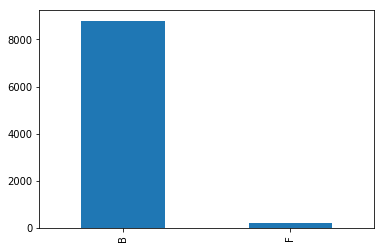

In [14]:
df.assay_type.value_counts().plot(kind='bar')

In [15]:
gb = df.groupby("molregno")

In [23]:
row_list = []
for k,v in gb:
    row_list.append([k,v.standard_value.mean()])
row_df = pd.DataFrame(row_list,columns=["name","standard_value"])

In [24]:
row_df.shape

(7438, 2)

In [25]:
import seaborn as sns

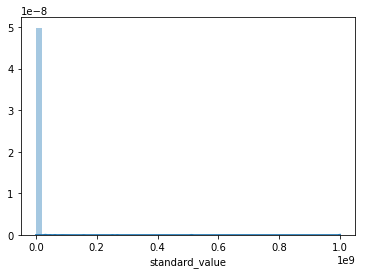

In [29]:
ax = sns.distplot(row_df.standard_value)

In [34]:
row_df["pIC50"] = -np.log10(row_df.standard_value * 1e-9)

In [35]:
row_df.head()

,name,standard_value,pIC50
0,97,9.149193e+03,5.038617
1,115,2.450806e+05,3.610691
2,146,1.414030e+06,2.849541
3,173,3.019952e+05,3.520000
4,241,8.026617e+05,3.095467


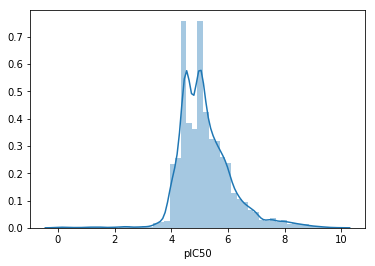

In [37]:
sns.distplot(row_df.pIC50)

In [38]:
df.dropna().shape

(8989, 13)

In [40]:
df.shape

(8989, 13)

In [43]:
row_df.sort_values("pIC50",ascending=True).head()

,name,standard_value,pIC50
5631,1758380,1.000000e+09,4.821637e-17
5632,1758382,1.000000e+09,4.821637e-17
5633,1758385,1.000000e+09,4.821637e-17
846,440049,9.549926e+08,2.000000e-02
860,440263,7.585776e+08,1.200000e-01


In [49]:
df.confidence_score.value_counts()

9    8491
8     498
Name: confidence_score, dtype: int64

In [50]:
score_9 = df.query("confidence_score == 9")

In [51]:
score_9.shape

(8491, 13)

In [52]:
score_9["extra"] = 3

/Users/pwalters/anaconda3/envs/rdkit_2018_09/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
score_9 = df.query("confidence_score == 9").copy()

In [55]:
score_9['extra'] = 3

In [56]:
score_9.head()

,canonical_smiles,molregno,mol_chembl_id,standard_relation,standard_value,standard_type,standard_units,description,organism,assay_type,confidence_score,pref_name,tgt_chembl_id,extra
0,COCC(=O)O[C@]1(CCN(C)CCCc2nc3ccccc3[nH]2)CCc4c...,72035,CHEMBL45816,=,1430.0,IC50,nM,K+ channel blocking activity in COS-7 African ...,Homo sapiens,F,9,HERG,CHEMBL240,3
1,CC(C)COCC(CN(Cc1ccccc1)c2ccccc2)N3CCCC3,112651,CHEMBL1008,=,550.0,IC50,nM,K+ channel blocking activity in COS-7 African ...,Homo sapiens,F,9,HERG,CHEMBL240,3
2,COc1c(N2C[C@@H]3CCCN[C@@H]3C2)c(F)cc4C(=O)C(=C...,1788,CHEMBL32,=,129000.0,IC50,nM,K+ channel blocking activity in Chinese hamste...,Homo sapiens,F,9,HERG,CHEMBL240,3
3,COc1c(N2CCNC(C)C2)c(F)cc3C(=O)C(=CN(C4CC4)c13)...,1712,CHEMBL31,=,130000.0,IC50,nM,K+ channel blocking activity in Chinese hamste...,Homo sapiens,F,9,HERG,CHEMBL240,3
4,CC1CN(CCN1)c2cc3N(C=C(C(=O)O)C(=O)c3c(C)c2F)C4CC4,17136,CHEMBL583,=,104000.0,IC50,nM,K+ channel blocking activity in Chinese hamste...,Homo sapiens,F,9,HERG,CHEMBL240,3


In [57]:
level_map = {8: 'fair', 9: 'good'}
df['confidence_level'] = df.confidence_score.map(level_map)

In [58]:
df.head()

,canonical_smiles,molregno,mol_chembl_id,standard_relation,standard_value,standard_type,standard_units,description,organism,assay_type,confidence_score,pref_name,tgt_chembl_id,confidence_level
0,COCC(=O)O[C@]1(CCN(C)CCCc2nc3ccccc3[nH]2)CCc4c...,72035,CHEMBL45816,=,1430.0,IC50,nM,K+ channel blocking activity in COS-7 African ...,Homo sapiens,F,9,HERG,CHEMBL240,good
1,CC(C)COCC(CN(Cc1ccccc1)c2ccccc2)N3CCCC3,112651,CHEMBL1008,=,550.0,IC50,nM,K+ channel blocking activity in COS-7 African ...,Homo sapiens,F,9,HERG,CHEMBL240,good
2,COc1c(N2C[C@@H]3CCCN[C@@H]3C2)c(F)cc4C(=O)C(=C...,1788,CHEMBL32,=,129000.0,IC50,nM,K+ channel blocking activity in Chinese hamste...,Homo sapiens,F,9,HERG,CHEMBL240,good
3,COc1c(N2CCNC(C)C2)c(F)cc3C(=O)C(=CN(C4CC4)c13)...,1712,CHEMBL31,=,130000.0,IC50,nM,K+ channel blocking activity in Chinese hamste...,Homo sapiens,F,9,HERG,CHEMBL240,good
4,CC1CN(CCN1)c2cc3N(C=C(C(=O)O)C(=O)c3c(C)c2F)C4CC4,17136,CHEMBL583,=,104000.0,IC50,nM,K+ channel blocking activity in Chinese hamste...,Homo sapiens,F,9,HERG,CHEMBL240,good


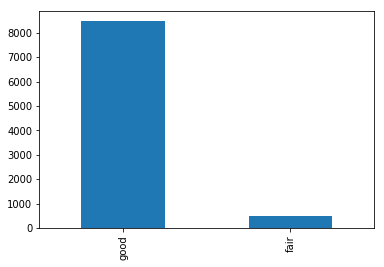

In [62]:
df.confidence_level.value_counts().plot(kind="bar")